In [1]:
import pandas as pd
# 용량이 크니 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_oct = pd.read_csv("./drive/MyDrive/BDA(ML)/수)BDA_추천알고리즘/과제/dataset/2019-Oct.csv")
df_nov = pd.read_csv("./drive/MyDrive/BDA(ML)/수)BDA_추천알고리즘/과제/dataset/2019-Nov.csv")
df_dec = pd.read_csv("./drive/MyDrive/BDA(ML)/수)BDA_추천알고리즘/과제/dataset/2019-Dec.csv")

# 필수과제1.2
- 요일 지수를 확인해야 하므로, 요일 지수에 따른 시각화와 인사이  트 정리
- 요일지수(Weekend Index): 특정 요일에 따른 데이터의 변동성을 나타내는 지표. 특정 요일의 패턴과 경향 파악에 용이
- 예시: 주말 vs 평일, 요일별 판매 패턴

In [7]:
def analyze_weekday_index(df, month_name):
    # 'event_time' 열을 datetime 형식으로 변환
    df['event_time'] = pd.to_datetime(df['event_time'])

    # 요일 추출
    df['weekday'] = df['event_time'].dt.day_name()

    # 요일별 이벤트 수 집계
    weekday_counts = df['weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday',
                                                           'Thursday', 'Friday', 'Saturday', 'Sunday'])
    weekday_counts.name = month_name  # 컬럼 이름 설정
    return weekday_counts

In [8]:
# 각 월별 요일 지수 분석
oct_weekday_index = analyze_weekday_index(df_oct, 'October')
nov_weekday_index = analyze_weekday_index(df_nov, 'November')
dec_weekday_index = analyze_weekday_index(df_dec, 'December')

# 결과를 데이터프레임으로 합치기
weekday_index_df = pd.concat([oct_weekday_index, nov_weekday_index, dec_weekday_index], axis=1)
weekday_index_df.columns = ['October', 'November', 'December']

# 시각화
- 11월 금,토요일에 유의미한 이벤트 증가가 있었음
- 11월이 전반적 이벤트 발생 빈도가 높다
- 12월이 전반적으로 이벤트 발생 빈도가 적다
- 10월은 화, 수의 이벤트 발생빈도가 높다

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

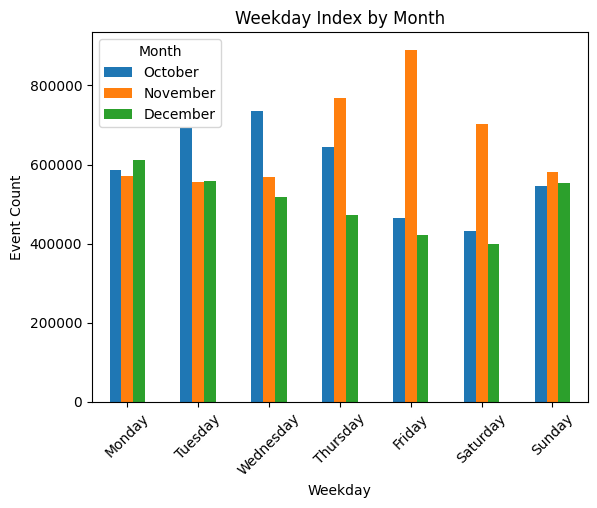

           October  November  December
weekday                               
Monday      586503    570479    610440
Tuesday     692527    556391    557281
Wednesday   736373    567795    517982
Thursday    644146    768822    473664
Friday      465654    889893    422157
Saturday    430942    701700    399261
Sunday      546138    580757    552501


In [10]:
# 시각화
plt.figure(figsize=(12, 6))
weekday_index_df.plot(kind='bar', rot=0)
plt.title('Weekday Index by Month')
plt.xlabel('Weekday')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.show()

# 인사이트 정리
print(weekday_index_df)